In [36]:
import os
import glob
import pandas as pd
import numpy as np
import json
import plotly.graph_objects as go
import plotly.io as pio
from collections import OrderedDict
from matplotlib import pyplot as plt

In [37]:
for xls in glob.glob('*'):
    print(xls)

ref
index.html
DB_Sofia.json
CNAME
README.md
styles
DB_Maria.json
template.html
Statistics.ipynb


In [38]:
birth = pd.Timestamp('2022-10-16')

In [39]:
'''
   Reading reference data
   source: https://www.who.int/tools/child-growth-standards/standards/weight-for-age
'''
source = dict()

# Girls table- Weight-for-age: Birth to 5 years (z-scores)
source['wfa_z'] = pd.read_excel('ref/wfa_girls_0-to-5-years_zscores.xlsx',
                                index_col=0)

# Girls table- Weight-for-age: Birth to 5 years (percentiles)
source['wfa_p'] = pd.read_excel('ref/tab_wfa_girls_p_0_5.xlsx',
                                index_col=0)

# Girls table- Head circumference for age: Birth to 5 years (z-scores)
source['hcfa_z'] = pd.read_excel('ref/hcfa-girls-0-5-zscores.xlsx',
                                 index_col=0)

# Girls table- Length-for-age: Birth to 2 years (z-scores)
source['lfa_birth_z'] = pd.read_excel('ref/lhfa_girls_0-to-2-years_zscores.xlsx',
                                      index_col=0)

# Girls table- Height-for-age: 2 to 5 years (z-scores)
source['lfa_2to5_z'] = pd.read_excel('ref/bmi_girls_2-to-5-years_zscores.xlsx',
                                     index_col=0)

# Binding index in months delta and data from birth
source_index = {i : birth + i * pd.DateOffset(months=1)
                   for i in source['wfa_z'].index}

In [40]:
# Reading Garotinhas json DB
with open("DB_Sofia.json", "r") as file:
    DB_sofia = json.load(file)
with open("DB_Maria.json", "r") as file:
    DB_maria = json.load(file)
    
# Creating Pandas DataFrame
sofia = pd.DataFrame.from_dict(DB_sofia,
                               orient='index')
maria = pd.DataFrame.from_dict(DB_maria,
                               orient='index')

'''
   Binding indexes for Sofia and Maria DB
   The indexes (date of doctors visit) is read as datetime 
   and then converted to timedelta in months (since the reference
   tables are indexed in months)
'''
gar_index = pd.to_datetime(sofia.index)
gar_delta_index = (gar_index - gar_index[-1])/np.timedelta64(1, 'M')

# Appling the new index
sofia.index = gar_delta_index
maria.index = gar_delta_index

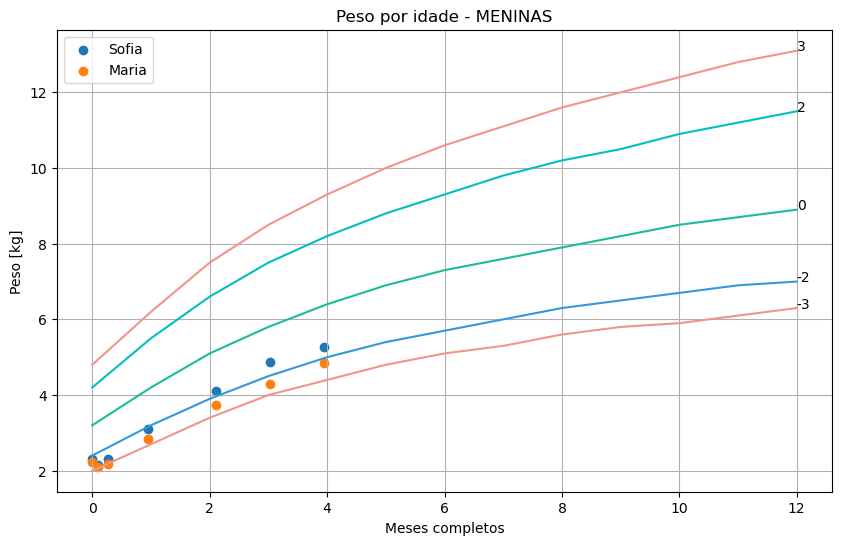

In [41]:
fig = plt.figure(figsize=(10, 6))
meses = 12

df = source['wfa_z']

# Curvas de referência
plt.plot(df.loc[:meses,['SD3neg']], color='#F1948A')
plt.plot(df.loc[:meses,['SD2neg']], color='#3498DB')
#plt.plot(df.loc[:meses,['SD1neg']], color='#5499C7')
plt.plot(df.loc[:meses,['SD0']], color='#1ABC9C')
#plt.plot(df.loc[:meses,['SD1']], color='#5499C7')
plt.plot(df.loc[:meses,['SD2']], color='c')
plt.plot(df.loc[:meses,['SD3']], color='#F1948A')

plt.annotate('-3',(meses,df['SD3neg'].loc[meses]))
plt.annotate('-2',(meses,df['SD2neg'].loc[meses]))
#plt.annotate('-1',(meses,df['SD1neg'].loc[meses]))
plt.annotate('0',(meses,df['SD0'].loc[meses]))
#plt.annotate('1',(meses,df['SD1'].loc[meses]))
plt.annotate('2',(meses,df['SD2'].loc[meses]))
plt.annotate('3',(meses,df['SD3'].loc[meses]))

# Dados das garotinhas
plt.scatter(x=sofia.index,
            y=sofia.Peso.values,
            label='Sofia')
plt.scatter(x=maria.index,
            y=maria.Peso.values,
            label='Maria')

plt.legend()
plt.title('Peso por idade - MENINAS')
plt.ylabel('Peso [kg]')
plt.xlabel('Meses completos')

plt.grid()

In [42]:
def plot_df(df, months_to_plot = 12):
    fig = go.Figure()
    
    # Curvas de referência
    fig.add_scatter(x=df.index,
                    y=df.SD3neg.loc[:months_to_plot].values,
                    mode='lines',
                    name='-3',
                    line={'color':'rgba(241, 148, 138, 0.5)'},
                    showlegend=False)
    fig.add_annotation(x=months_to_plot,
                       y=df.SD3neg.loc[months_to_plot],
                       text="-3",
                       showarrow=False)
    fig.add_scatter(x=df.index,
                    y=df.SD3.loc[:months_to_plot].values,
                    mode='lines',
                    name='3',
                    line={'color':'rgba(241, 148, 138, 0.5)'},
                    showlegend=False)
    fig.add_annotation(x=months_to_plot,
                       y=df.SD3.loc[months_to_plot],
                       text="3",
                       showarrow=False)
    fig.add_scatter(x=df.index,
                    y=df.SD2neg.loc[:months_to_plot].values,
                    mode='lines',
                    name='-2',
                    line={'color':'rgba(52, 152, 219, 0.5)'},
                    showlegend=False)
    fig.add_annotation(x=months_to_plot,
                       y=df.SD2neg.loc[months_to_plot],
                       text="-2",
                       showarrow=False)
    fig.add_scatter(x=df.index,
                    y=df.SD2.loc[:months_to_plot].values,
                    mode='lines',
                    name='2',
                    line={'color':'rgba(52, 152, 219, 0.5)'},
                    showlegend=False)
    fig.add_annotation(x=months_to_plot,
                       y=df.SD2.loc[months_to_plot],
                       text="2",
                       showarrow=False)
    fig.add_scatter(x=df.index,
                    y=df.SD0.loc[:months_to_plot].values,
                    mode='lines',
                    name='0',
                    line={'color':'rgba(26, 188, 156, 0.5)'},
                    showlegend=False)
    fig.add_annotation(x=months_to_plot,
                       y=df.SD0.loc[months_to_plot],
                       text="0",
                       showarrow=False)

    # Dados das garotinhas
    fig.add_scatter(x=sofia.index,
                    y=sofia.Peso.values,
                    mode='markers',
                    name='Sofia')
    fig.add_scatter(x=maria.index,
                    y=maria.Peso.values,
                    mode='markers',
                    name='Maria')

    fig.update_layout(autosize=False,
                      width=800,
                      height=600,
                      title='Evolução do peso',
                      title_x=0.5,
                      xaxis=dict(title_text="Meses Completos"),
                      yaxis=dict(title_text="Peso [kg]"),
                      legend=dict(yanchor="top",
                                  xanchor="left",
                                  y=0.98,
                                  x=0.01))
    fig.show()

In [43]:
fig = go.Figure()

months_to_plot = 12

# Curvas de referência
fig.add_scatter(x=df.index,
                y=df.SD3neg.loc[:months_to_plot].values,
                mode='lines',
                name='-3',
                line={'color':'rgba(241, 148, 138, 0.5)'},
                showlegend=False)
fig.add_annotation(x=months_to_plot,
                   y=df.SD3neg.loc[months_to_plot],
                   text="-3",
                   showarrow=False)
fig.add_scatter(x=df.index,
                y=df.SD3.loc[:months_to_plot].values,
                mode='lines',
                name='3',
                line={'color':'rgba(241, 148, 138, 0.5)'},
                showlegend=False)
fig.add_annotation(x=months_to_plot,
                   y=df.SD3.loc[months_to_plot],
                   text="3",
                   showarrow=False)
fig.add_scatter(x=df.index,
                y=df.SD2neg.loc[:months_to_plot].values,
                mode='lines',
                name='-2',
                line={'color':'rgba(52, 152, 219, 0.5)'},
                showlegend=False)
fig.add_annotation(x=months_to_plot,
                   y=df.SD2neg.loc[months_to_plot],
                   text="-2",
                   showarrow=False)
fig.add_scatter(x=df.index,
                y=df.SD2.loc[:months_to_plot].values,
                mode='lines',
                name='2',
                line={'color':'rgba(52, 152, 219, 0.5)'},
                showlegend=False)
fig.add_annotation(x=months_to_plot,
                   y=df.SD2.loc[months_to_plot],
                   text="2",
                   showarrow=False)
fig.add_scatter(x=df.index,
                y=df.SD0.loc[:months_to_plot].values,
                mode='lines',
                name='0',
                line={'color':'rgba(26, 188, 156, 0.5)'},
                showlegend=False)
fig.add_annotation(x=months_to_plot,
                   y=df.SD0.loc[months_to_plot],
                   text="0",
                   showarrow=False)

# Dados das garotinhas
fig.add_scatter(x=sofia.index,
                y=sofia.Peso.values,
                mode='markers',
                name='Sofia')
fig.add_scatter(x=maria.index,
                y=maria.Peso.values,
                mode='markers',
                name='Maria')

fig.update_layout(autosize=False,
                  width=800,
                  height=600,
                  title='Evolução do peso',
                  title_x=0.5,
                  xaxis=dict(title_text="Meses Completos"),
                  yaxis=dict(title_text="Peso [kg]"),
                  legend=dict(yanchor="top",
                              xanchor="left",
                              y=0.98,
                              x=0.01))
fig.show()

In [44]:
json_file = pio.to_json(fig)

In [45]:
str_peso_data = json.dumps(json.loads(json_file)['data'])

In [46]:
str_peso_layout = json.dumps(json.loads(json_file)['layout'])

In [47]:
with open('template.html', 'r') as html:
    file = html.read()  
file = file.replace("peso_data", str_peso_data)
file = file.replace("peso_layout", str_peso_layout)

with open('index.html', 'w') as html:
    html.write(file)